<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Classification/Kidney_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt


In [ ]:
# !apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
# !apt install cm-super

In [ ]:
# plt.rcParams['text.usetex'] = True

**Reading the data**

In [ ]:
# Importing the datasets
df     = pd.read_csv('ckd_clean.csv')

**Display the data**

In [ ]:
df.shape

(158, 25)

**Display sample data**

In [ ]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,1


In [ ]:
# Drop rows with any NaN values
df = df.dropna()

In [ ]:
import pandas as pd

# Get the size of the dataframe
num_rows, num_cols = df.shape

# Define the mapping dictionary
# mapping_dict = {'normal': 1, 'abnormal': 0, 'present': 1, 'notpresent': 0, 'good': 1, 'poor': 0, 'yes': 1, 'no': 0}
mapping_dict = {'normal': 1, 'abnormal': 0, 'present': 1, 'notpresent': 0, 'good': 1, 'poor': 0, 'yes': 1, 'no': 0}

# Apply conversion to all columns
for column in df.columns:
    df[column] = df[column].replace(mapping_dict)

# Print the updated dataframe
# print(df)

In [ ]:
df.sample(n = 10)

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
75,47.0,80.0,1.025,0.0,0.0,1,1,0,0,124.0,...,41.0,7000.0,5.7,0,0,0,1,0,0,0
120,47.0,60.0,1.020,0.0,0.0,1,1,0,0,117.0,...,45.0,5200.0,5.6,0,0,0,1,0,0,0
145,15.0,80.0,1.025,0.0,0.0,1,1,0,0,93.0,...,50.0,6200.0,5.2,0,0,0,1,0,0,0
72,66.0,70.0,1.020,0.0,0.0,1,1,0,0,94.0,...,41.0,5300.0,5.9,0,0,0,1,0,0,0
13,63.0,100.0,1.010,2.0,2.0,1,1,0,1,280.0,...,40.0,9800.0,4.2,1,0,1,1,0,0,1
103,62.0,80.0,1.020,0.0,0.0,1,1,0,0,132.0,...,44.0,4700.0,4.5,0,0,0,1,0,0,0
54,49.0,80.0,1.020,0.0,0.0,1,1,0,0,122.0,...,41.0,5600.0,4.9,0,0,0,1,0,0,0
152,50.0,80.0,1.020,0.0,0.0,1,1,0,0,137.0,...,45.0,9500.0,4.6,0,0,0,1,0,0,0
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16.0,11000.0,2.6,1,1,1,0,1,0,1
16,73.0,100.0,1.010,3.0,2.0,0,0,1,0,295.0,...,30.0,7000.0,3.2,1,1,1,0,0,0,1


In [ ]:
ones_count = df['Class'].value_counts()[1]
print(ones_count)

43


In [ ]:
zeros_count = df['Class'].value_counts()[0]
print(zeros_count)

115


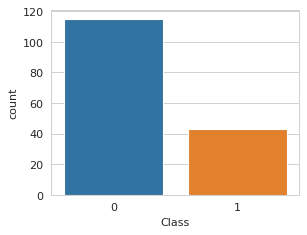

In [ ]:
# Create a figure with size 8x6 inches, 80 dots per inch resolution
fig = plt.figure(figsize=(4,3), dpi=80)
# Calculate the number of classes in the class
sns.countplot(data=df, x='Class')
plt.savefig('classes.png')

In [ ]:
# from matplotlib import pyplot as plt

# fig, axes = plt.subplots(1,3,figsize=(8,3),sharey=True)
# sns.countplot(ax=axes[0],data=df, x='Class')
# sns.countplot(ax=axes[1],data=df, x='Sex')
# sns.countplot(ax=axes[2],data=df, x='BMI')
# plt.savefig('Statistics.png')




```
# This is formatted as code
```

**Correlation between different variables**

In [ ]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='Class', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['Class'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 Class                       1
Albumin                     2
Hypertension                3
Hemoglobin                  4
Packed Cell Volume          5
Specific Gravity            6
Pus Cell                    7
Diabetes Mellitus           8
Red Blood Cell Count        9
Serum Creatinine           10
Blood Urea                 11
Sodium                     12
Pedal Edema                13
Appetite                   14
Blood Glucose Random       15
Red Blood Cells            16
Anemia                     17
Sugar                      18
Pus Cell clumps            19
Bacteria                   20
Coronary Artery Disease    21
White Blood Cell Count     22
Blood Pressure             23
Age                        24
Potassium                  25
Name: Class, dtype: int64


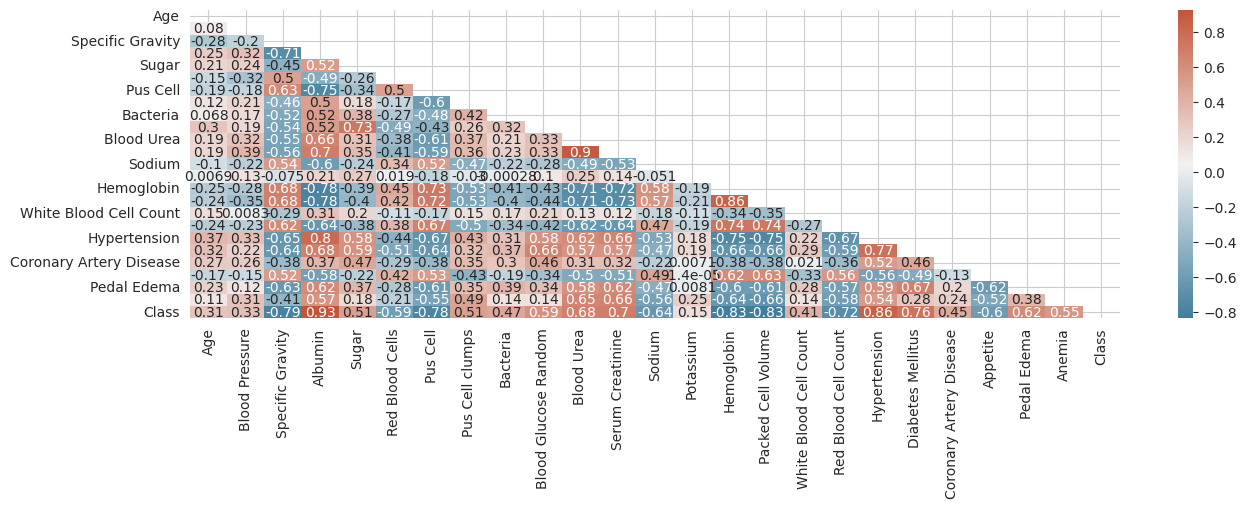

In [ ]:
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(15, 4))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.savefig('Heatmap.png')

**Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Assuming your DataFrame is called `df` and the target variable is called `Prediction`
X = df.drop('Class', axis=1)
y = df['Class']

# Instantiate a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled X and y into a new DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)


In [ ]:
df.shape

(86, 25)

In [ ]:
# # example of random undersampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# # The class can be used just like the RandomOverSampler class in the 
# # previous section, except the strategies impact the majority class 
# # instead of the minority class. For example, setting the sampling_strategy 
# # argument to “majority” will oversample the majority class determined 
# # by the class with the largest number of examples.

# # define Oversample strategy
# oversample = RandomOverSampler(sampling_strategy='not majority')
# x_over, y_over = oversample.fit_resample(x_data,y_data)

In [ ]:
# y_over.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# x_over.shape

In [ ]:
# X

**Preparing data for machine learning classifier**



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Class'], axis=1), 
                                                    df['Class'], 
                                                    test_size=0.25, 
                                                    random_state=42)

**Feature selection**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

#======================================
# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance. 
selector  = SelectKBest(f_classif, k=5)
#======================================

x_train    = selector.fit_transform(X_train, Y_train)
x_test     = selector.transform(X_test)

y_train = Y_train
y_test  = Y_test

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Get the selected feature names
selected_feature_names = X_train.columns[selector.get_support()]

print(selected_feature_names)

Index(['Specific Gravity', 'Albumin', 'Hemoglobin', 'Packed Cell Volume',
       'Hypertension'],
      dtype='object')


In [ ]:
# sns.pairplot(df, vars=['Weight (lb)', 'BAN', 'AHI','Class'])
# plt.savefig('Correction with Class.png')

In [ ]:
X_train[selected_feature_names].head()

,Specific Gravity,Albumin,Hemoglobin,Packed Cell Volume,Hypertension
40,1.020,0.0,15.0,50.0,0
28,1.025,0.0,16.7,50.0,0
9,1.020,0.0,13.9,44.0,0
65,1.010,3.0,7.9,25.0,1
5,1.020,0.0,13.6,44.0,0


**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

def calculate_confusion(clf_name, y_train, y_pred_train, y_test, y_pred_test):
 
    # Calculate accuracy, precision, recall, and F1 score for training and testing sets
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Calculate the confusion matrix for training and testing sets
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Create a 1x2 figure with the confusion matrix on the left and evaluation metrics on the right
    fig, axs = plt.subplots(1, 2, figsize=(6,2),sharey=True)
    
    # Plot the confusion matrix for training set
    sns.heatmap(train_cm, annot=True, cmap='YlGnBu', fmt='g', ax=axs[0], annot_kws={"size": 12}, cbar_kws={"shrink": 0.7})
    axs[0].set_title('Training Set',fontsize=10)
    axs[0].set_xlabel('Predicted Labels',fontsize=10)
    axs[0].set_ylabel('True Labels',fontsize=10)
    
    # Plot the confusion matrix for testing set
    sns.heatmap(test_cm, annot=True, cmap='YlGnBu', fmt='g', ax=axs[1], annot_kws={"size": 12}, cbar_kws={"shrink": 0.7})
    axs[1].set_title('Testing Set',fontsize=10)
    axs[1].set_xlabel('Predicted Labels',fontsize=10)
    axs[1].set_ylabel('True Labels',fontsize=10)
    
    # Add a main title to the figure
    # fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=12, y=1.01, fontname='Times')
    # fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=12, y=1.09)
    plt.savefig(clf_name + ".png")
    # Show the plot
    plt.show()

    # Define the performance metrics for training and testing cases
    train_metrics = ["Train Accuracy", "Train Precision", "Train Recall", "Train F1"]
    test_metrics = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]

    # Create a list of lists containing the metrics
    table = [train_metrics + test_metrics,
         [train_acc, train_prec, train_rec, train_f1, test_acc, test_prec, test_rec, test_f1]]

    # Print the table
    print('-----Results for',clf_name,'----------------------')
    print(tabulate(table, headers='firstrow'))

# Logistic Regression

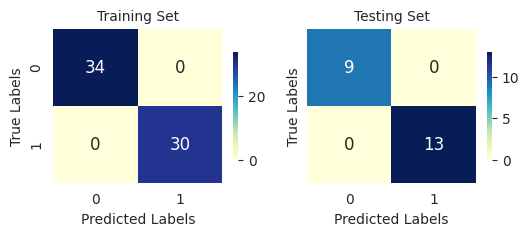

-----Results for LR ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
               1                  1               1           1                1                 1              1          1


In [ ]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results = []
names   = []
scoring = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_test, y_test)
results.append(cv_results)  

In [ ]:
# Compute False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_train,lr.predict(x_train))

# Support Vector Machine

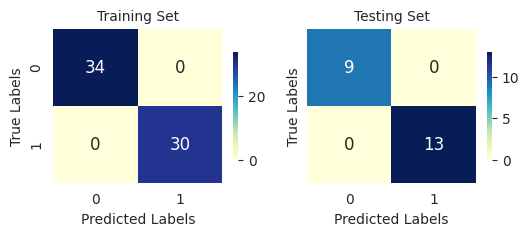

-----Results for SVM ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
               1                  1               1           1                1                 1              1          1


In [ ]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_train,svm.predict(x_train))

# Gradient Boosting Classifier

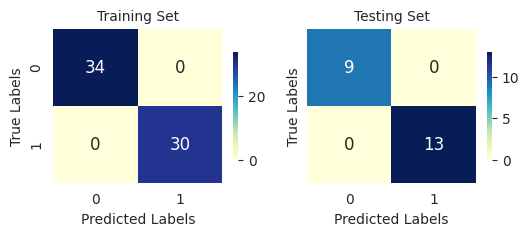

-----Results for GBC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
               1                  1               1           1                1                 1              1          1


In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)

calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_train,y_pred_train)

# GaussianNB

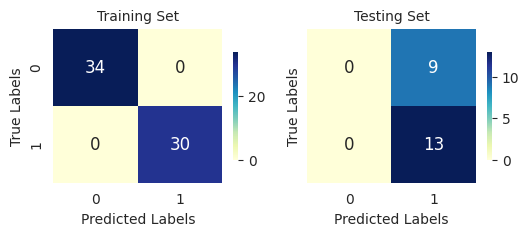

-----Results for GNB ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
               1                  1               1           1         0.590909          0.590909              1   0.742857


In [ ]:
#GaussianNB
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=None, var_smoothing=1e-9)
GNB.fit(x_train, y_train)

# Adjust classification threshold to 0.3
y_pred_train = GNB.predict(x_train)
# y_pred_train = (y_pred_train >= 0.1).astype(int)

y_pred_test  = GNB.predict(x_test)
# y_pred_test = (y_pred_test >= 0.1).astype(int)

calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_train,GNB.predict(x_train))

# KNeighborsClassifier

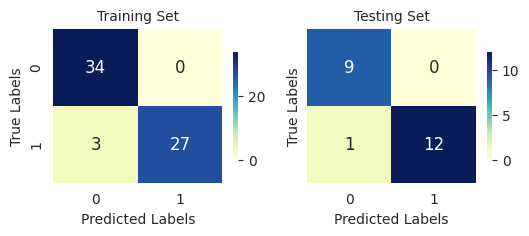

-----Results for KNC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.953125                  1             0.9    0.947368         0.954545                 1       0.923077       0.96


In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_train,KNC.predict(x_train))

# Decision Tree

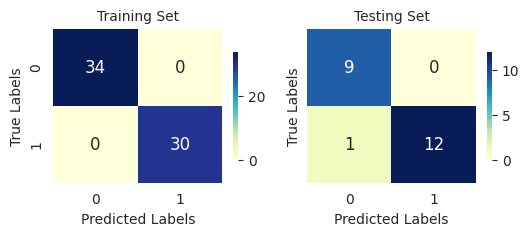

-----Results for DT ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
               1                  1               1           1         0.954545                 1       0.923077       0.96


In [ ]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, DT.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc6 = metrics.roc_auc_score(y_train,y_pred_train)

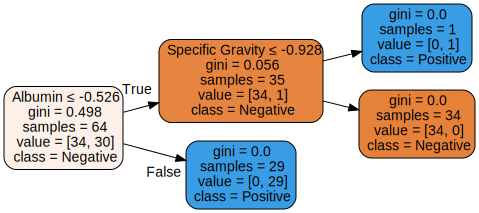

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Class'], axis=1), 
                                                    df['Class'], 
                                                    test_size=0.25, 
                                                    random_state=42)

# Train the decision tree on the scaled data
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)

# Export the tree as a Graphviz dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=selected_feature_names,
                           class_names=['Negative', 'Positive'], filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('decision tree', view=False)

# Display the graph
graph


In [ ]:
# Plotting the Decision Tree diagram
# from sklearn.tree import plot_tree
# plt.figure(figsize=(4,4))
# plot_tree(DT, filled=True, feature_names=selected_feature_names, class_names='Class')
# plt.show()

# Random Forest Classifier

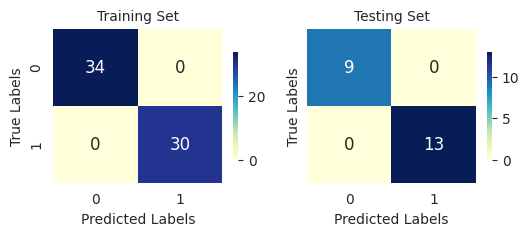

-----Results for RFC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
               1                  1               1           1                1                 1              1          1


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier with max_features set to 0.5
RFC = RandomForestClassifier(n_estimators=100, max_depth=7, criterion='gini', max_features=1.0, random_state=42)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_train, RFC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc7 = metrics.roc_auc_score(y_train,y_pred_train)

In [ ]:
# Create a Random Forest classifier object
RFC= RandomForestClassifier(n_estimators=10, ccp_alpha=0.01)

# Train the model on the data
RFC.fit(X, y)

# Print the trained decision trees
for i, tree in enumerate(RFC.estimators_):
    print(f"Tree {i}:")
    print(tree.tree_.max_depth)  # print the depth of each tree

Tree 0:
2
Tree 1:
2
Tree 2:
1
Tree 3:
2
Tree 4:
4
Tree 5:
2
Tree 6:
3
Tree 7:
1
Tree 8:
3
Tree 9:
3


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Choose the best tree from the forest based on mean decrease impurity
# best_tree_index = RFC.feature_importances_.argmax()

# # Plot the best tree in the forest
# fig, ax = plt.subplots(figsize=(10, 10))
# plot_tree(RFC.estimators_[best_tree_index], ax=ax)
# plt.show()

In [ ]:
print(selected_feature_names)

Index(['Specific Gravity', 'Albumin', 'Hemoglobin', 'Packed Cell Volume',
       'Hypertension'],
      dtype='object')


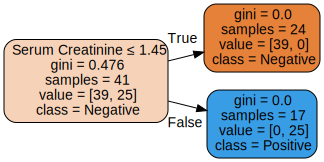

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'], axis=1), df['Class'], test_size=0.25, random_state=42)

# Train a random forest classifier on the training data
RFC = RandomForestClassifier(n_estimators=100, max_depth=7, criterion='gini', max_features=1.0, random_state=42, ccp_alpha=0.01)
RFC.fit(X_train, y_train)

# Extract feature names from the dataframe
feature_names = X_train.columns

# Export the random forest as a Graphviz dot file
dot_data = export_graphviz(RFC.estimators_[0], out_file=None, feature_names=feature_names,
                           class_names=['Negative', 'Positive'], filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('random forest', view=False)

# Display the graph
graph


# Artificial Neural Network

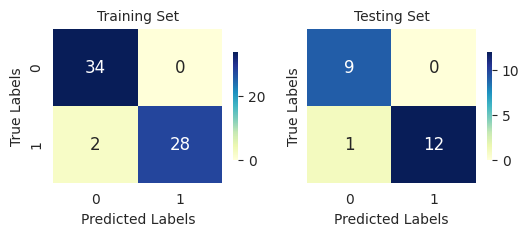

-----Results for ANN ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
         0.96875                  1        0.933333    0.965517         0.954545                 1       0.923077       0.96


In [ ]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 1000, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, ANN.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc8 = metrics.roc_auc_score(y_train,y_pred_train)

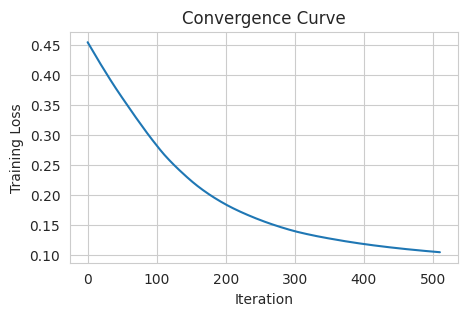

In [ ]:
# Get the training loss values at each iteration
loss_values = ANN.loss_curve_

fig = plt.figure(figsize=(5,3))
# Plot the convergence curve
plt.plot(loss_values)
plt.grid(True)
plt.title('Convergence Curve')
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Training Loss', fontsize=10)
plt.savefig('ANN_convergence.png')
plt.show()

# Box Plot

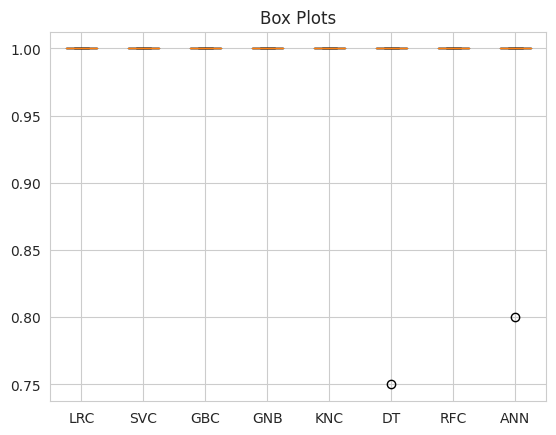

In [ ]:
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN']

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1)

# Draw the box plots
ax.boxplot(results)

# Set the labels for each box plot
ax.set_xticklabels(names)

# Add a title to the plot
ax.set_title('Box Plots')

# Show the plot
plt.show()

In [ ]:
auc1

1.0

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the FPR and TPR values for each algorithm as arrays
# np.array(['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN'])
# fpr = [fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7,fpr8]
# tpr = [tpr1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7,tpr8]
# auc = [auc1,auc2,auc3,auc4,auc5,auc6,auc7,auc8]

# # Plot the ROC curve for each algorithm
# plt.figure(figsize=(8, 4))
# # Create plot
# for i in range(len(fpr)):
#     label_str = f"{names[i]} AUC = {auc[i]:.2f}"
#     plt.plot(fpr[i], tpr[i], label=label_str)

# # Set the axis labels and title
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('ROC Curve')

# # Set the axis limits
# plt.xlim([0, 1])
# plt.ylim([0, 1])

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()

In [ ]:
print(selected_feature_names)

Index(['Specific Gravity', 'Albumin', 'Hemoglobin', 'Packed Cell Volume',
       'Hypertension'],
      dtype='object')


# ROC Curves

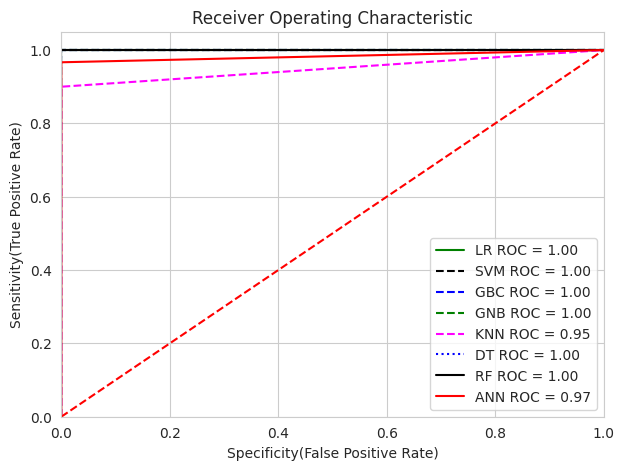

In [ ]:
# Now, plot the computed values
fig = plt.figure(figsize=(7,5))

plt.plot(fpr1, tpr1, linestyle='-',color='green', label='LR ROC = %.2f' %auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='black', label='SVM ROC = %.2f' %auc2)
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='GBC ROC = %.2f' %auc3)
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='GNB ROC = %.2f' %auc4)
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='KNN ROC = %.2f' %auc5)
plt.plot(fpr6, tpr6, linestyle=':',color='blue', label='DT ROC = %.2f' %auc6)
plt.plot(fpr7, tpr7, linestyle='-',color='black', label='RF ROC = %.2f' %auc7)
plt.plot(fpr8, tpr8,linestyle='-',color='red', label='ANN ROC = %.2f' %auc8)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display